In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("campaign-finance-expenditures-dataset-1.csv")

# Preview data
df.head()


,Payee,Paid_By,Payment_Amount,Payment_Date,Payee_Type,Payee_Address,City_State_Zip,Payment_Year,Expenditure_Type,Date_Reported,Report_Filed,Expense_Description,Travel_Outside_Texas,Political_Obligation,Reimbursement_Intended,Correction,View_Report,TRANSACTION_ID
0,Austin's Pizza,Austin Unites,$196.35,04/30/2016,Entity,2222 Rio Grande St #110,"Austin, TX, 78705",2016,Political Expenditure from Political Contribut...,07/18/2016,SPAC: Specific-Purpose Committee Campaign Fina...,Food/Beverage Expense | Volunteer Food,NaN,Yes,NaN,NaN,View Report (http://www.austintexas.gov/edims/...,R20160718161156-F0001
1,"Moreland Consulting, LLC",Austin4All PAC,$2725.00,03/09/2016,Entity,5202 Woodmoor Dr,"Austin, TX, 78221",2016,Political Expenditure from Political Contribut...,07/18/2016,SPAC: Specific-Purpose Committee Campaign Fina...,Consulting,NaN,Yes,NaN,NaN,View Report (http://www.austintexas.gov/edims/...,R20160718161720-F0003
2,Wells Fargo,Austin4All PAC,$15.00,03/03/2016,Entity,3949 S Lamar Blvd,"Austin, TX, 78704",2016,Non-political Expenditure Made From Political ...,07/18/2016,SPAC: Specific-Purpose Committee Campaign Fina...,Fee,NaN,No,NaN,NaN,View Report (http://www.austintexas.gov/edims/...,R20160718161720-F0004
3,Wells Fargo,Austin4All PAC,$14.00,05/31/2016,Entity,3949 S Lamar Blvd,"Austin, TX, 78704",2016,Non-political Expenditure Made From Political ...,07/18/2016,SPAC: Specific-Purpose Committee Campaign Fina...,Fee,NaN,No,NaN,NaN,View Report (http://www.austintexas.gov/edims/...,R20160718161720-F0005
4,Wells Fargo,Austin4All PAC,$14.00,06/30/2016,Entity,3949 S Lamar Blvd,"Austin, TX, 78704",2016,Non-political Expenditure Made From Political ...,07/18/2016,SPAC: Specific-Purpose Committee Campaign Fina...,Fee,NaN,No,NaN,NaN,View Report (http://www.austintexas.gov/edims/...,R20160718161720-F0006


In [3]:
# Dataset structure
df.shape

# Column names
df.columns

# Data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Payee                   3152 non-null   object 
 1   Paid_By                 3152 non-null   object 
 2   Payment_Amount          3152 non-null   object 
 3   Payment_Date            3152 non-null   object 
 4   Payee_Type              3152 non-null   object 
 5   Payee_Address           3150 non-null   object 
 6   City_State_Zip          3151 non-null   object 
 7   Payment_Year            3152 non-null   int64  
 8   Expenditure_Type        2646 non-null   object 
 9   Date_Reported           3152 non-null   object 
 10  Report_Filed            3152 non-null   object 
 11  Expense_Description     3149 non-null   object 
 12  Travel_Outside_Texas    0 non-null      float64
 13  Political_Obligation    2196 non-null   object 
 14  Reimbursement_Intended  39 non-null     

In [5]:
# Convert Payment_Amount to numeric
df['Payment_Amount'] = (
    df['Payment_Amount']
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)

# Convert dates to datetime format
df['Payment_Date'] = pd.to_datetime(df['Payment_Date'], errors='coerce')

# Check for missing values
df.isnull().sum()

# Verify unique transactions
df['TRANSACTION_ID'].nunique()


3152

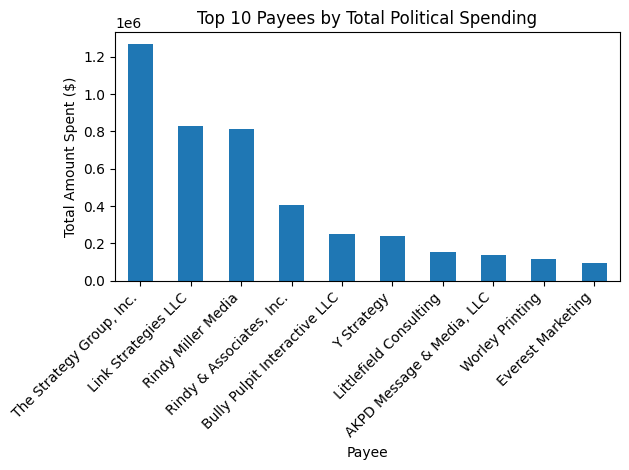

In [12]:
top_payees = (
    df.groupby('Payee')['Payment_Amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_payees.plot(kind='bar')
plt.title("Top 10 Payees by Total Political Spending")
plt.xlabel("Payee")
plt.ylabel("Total Amount Spent ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



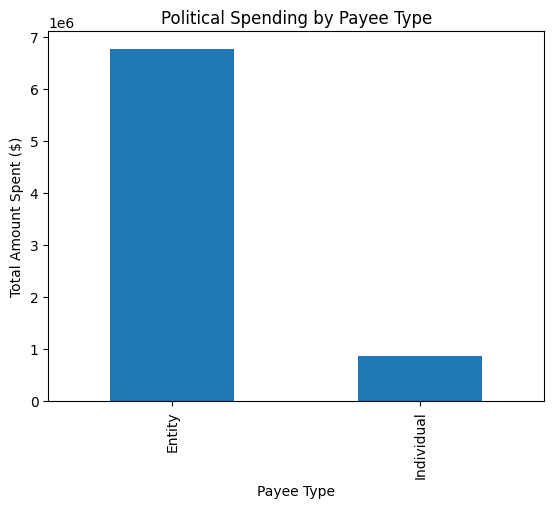

In [13]:
payee_type_totals = df.groupby('Payee_Type')['Payment_Amount'].sum()

plt.figure()
payee_type_totals.plot(kind='bar')
plt.title("Political Spending by Payee Type")
plt.xlabel("Payee Type")
plt.ylabel("Total Amount Spent ($)")
plt.show()


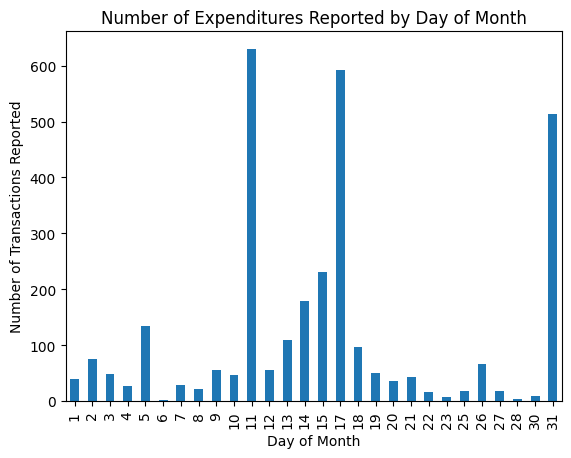

In [15]:
# Convert Date_Reported to datetime
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], errors='coerce')

# Extract day of month
df['Reported_Day'] = df['Date_Reported'].dt.day

# Count reports by day
reported_day_counts = df['Reported_Day'].value_counts().sort_index()

plt.figure()
reported_day_counts.plot(kind='bar')
plt.title("Number of Expenditures Reported by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Number of Transactions Reported")
plt.show()


